# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.info())
print()
print(df_hh_income.duplicated(subset=["Geographic Area", "City"]).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
None

0


In [6]:
print(df_pct_poverty.info())
print()
print(df_pct_poverty.duplicated(subset=["Geographic Area", "City"]).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

0


In [7]:
print(df_pct_completed_hs.info())
print()
print(df_pct_completed_hs.duplicated(subset=["Geographic Area", "City"]).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
None

0


In [8]:
print(df_share_race_city.info())
print()
print(df_share_race_city.duplicated(subset=["Geographic area", "City"]).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB
None

0


In [9]:
print(df_fatalities.info())
print()
print(df_fatalities.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

df_hh_income 데이터 세트와 df_fatalities 데이터 세트에 결측값이 있음

중복된 데이터는 없음

In [10]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [11]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [12]:
# df_fatalities.fillna("Null", inplace=True)

문자형 결측들을 0으로 변환 및 데이터 형 변환

In [13]:
df_hh_income["Median Income"][df_hh_income["Median Income"] == "(X)"] = 0
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("-", "")
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace(",", "")
df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("+", "")
df_hh_income["Median Income"] = pd.to_numeric(df_hh_income["Median Income"])
df_hh_income.fillna(0, inplace=True)
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29322 non-null  object 
 1   City             29322 non-null  object 
 2   Median Income    29322 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.4+ KB


<ipython-input-13-640e573e651b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hh_income["Median Income"] = df_hh_income["Median Income"].str.replace("+", "")


In [14]:
df_pct_poverty.poverty_rate[df_pct_poverty.poverty_rate == '-'] = 0
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [15]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace("-", "")
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.fillna(0, inplace=True)

In [16]:
for col in df_share_race_city.columns[2:]:
    df_share_race_city[col][df_share_race_city[col] == "(X)"] = 0
    df_share_race_city[col][df_share_race_city[col] == "()"] = 0
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col])

df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


<ipython-input-16-9758139ea575>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_share_race_city[col][df_share_race_city[col] == "(X)"] = 0
<ipython-input-16-9758139ea575>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_share_race_city[col][df_share_race_city[col] == "()"] = 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [17]:
state_poverty = df_pct_poverty.groupby("Geographic Area", as_index=False).mean()
state_poverty.sort_values("poverty_rate", ascending=False, inplace=True)

<ipython-input-17-fa1185217766>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  state_poverty = df_pct_poverty.groupby("Geographic Area", as_index=False).mean()


In [18]:
bar = px.bar(state_poverty,
             x="Geographic Area",
             y="poverty_rate",
             color="poverty_rate",
             color_continuous_scale="OrRd")
bar.update_layout(title="Poverty Rate in Each State")
bar.show()

Mississippi 주가 가장 빈곤율이 높고, New Jersey 주가 빈곤율이 가장 낮다

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [19]:
state_hs_grad = df_pct_completed_hs.groupby("Geographic Area", as_index=False).mean()
state_hs_grad = state_hs_grad.sort_values("percent_completed_hs")

bar = px.bar(state_hs_grad,
             x="Geographic Area",
             y="percent_completed_hs", 
             color="percent_completed_hs",
             color_continuous_scale="Emrld")
bar.update_layout(title="High School Graduation Rate by US State")
bar.show()

<ipython-input-19-6144c0e7c1eb>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Texas 주가 고등학교 졸업률이 가장 낮고, Massachusetts 주가 가장 고등학교 졸업률이 높다.

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [20]:
state_poverty.sort_values("Geographic Area", inplace=True)
state_hs_grad.sort_values("Geographic Area", inplace=True)

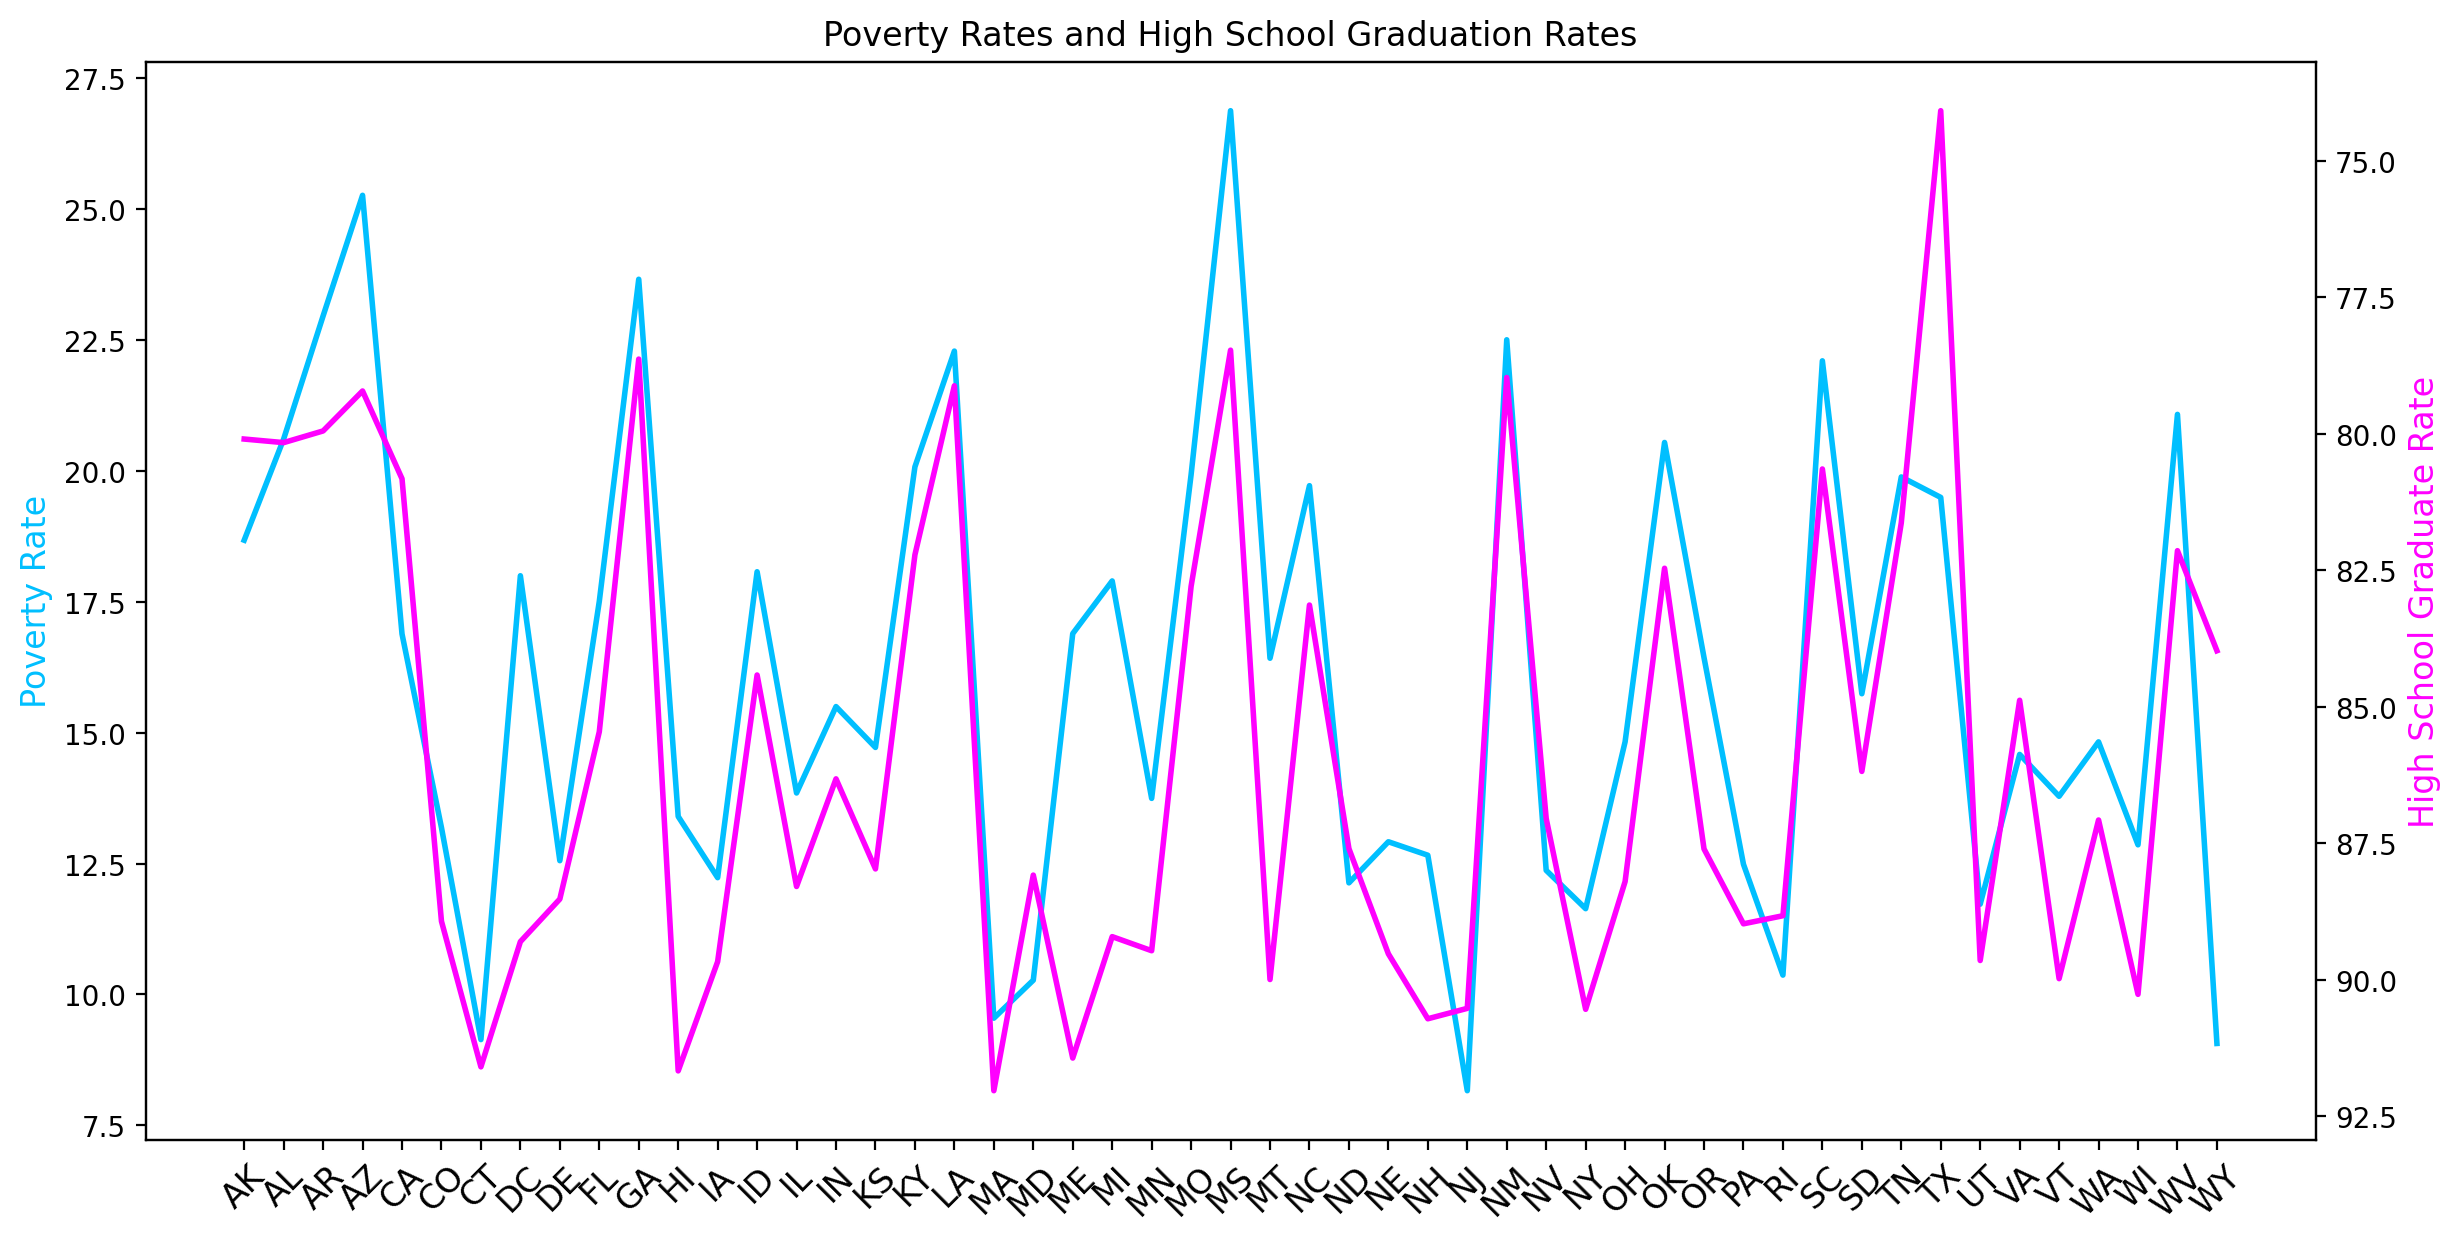

In [21]:
plt.figure(figsize=(14,7), dpi=200)
plt.title("Poverty Rates and High School Graduation Rates")
plt.xticks(fontsize=12, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.invert_yaxis()

ax1.set_ylabel("Poverty Rate", fontsize=12, color="deepskyblue")
ax2.set_ylabel("High School Graduate Rate", fontsize=12, color="magenta")

ax1.plot(state_poverty["Geographic Area"], state_poverty.poverty_rate, linewidth=2, color="deepskyblue")
ax2.plot(state_hs_grad["Geographic Area"], state_hs_grad.percent_completed_hs, linewidth=2, color="magenta")

plt.show()

빈곤율이 높을 수록 고등학교 졸업률이 낮아지는 경향이 있음

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

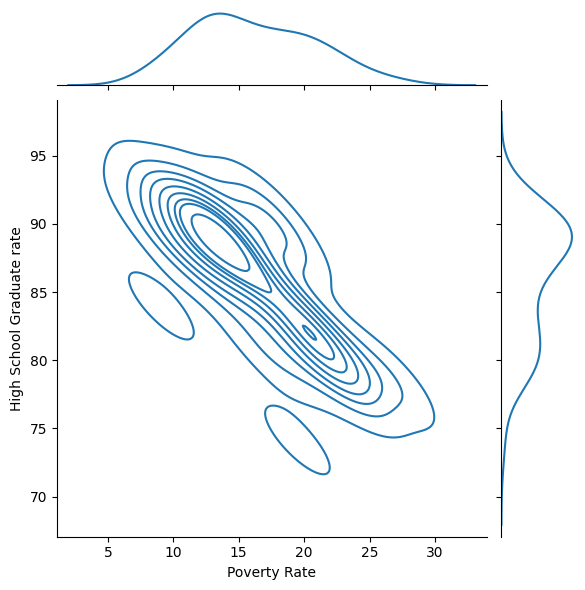

In [22]:
sns.jointplot(x=state_poverty.poverty_rate,
              y=state_hs_grad.percent_completed_hs,
              kind="kde")
plt.xlabel("Poverty Rate")
plt.ylabel("High School Graduate rate")

plt.show()

음의 관계를 확인할 수 있음

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

In [23]:
grad_pov = pd.merge(state_poverty, state_hs_grad, on="Geographic Area")

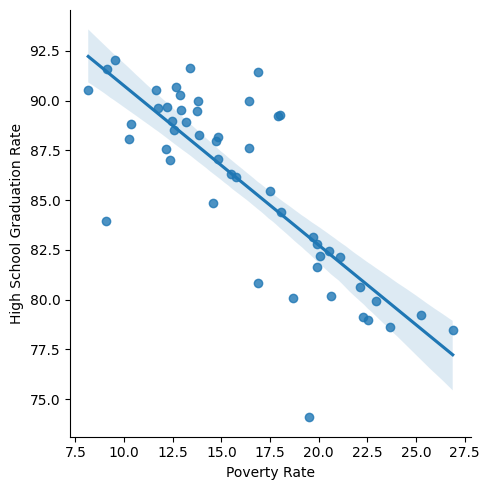

In [24]:
sns.lmplot(data=grad_pov,
           x="poverty_rate",
           y="percent_completed_hs")

plt.xlabel("Poverty Rate")
plt.ylabel("High School Graduation Rate")

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [25]:
state_race = df_share_race_city.groupby(["Geographic area"], as_index=False).mean()

<ipython-input-25-28d7e6f03790>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [26]:
bar = px.bar(state_race,
             x="Geographic area",
             y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"])
bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
fatal_race = df_fatalities.race.value_counts()

pie = px.pie(names=fatal_race.index,
             values=fatal_race.values,
             hole=0.5,
             title="People Killed by Race")
pie.update_traces(textinfo="label+percent")
pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [28]:
fatal_gender = df_fatalities.gender.value_counts()

In [29]:
bar = px.bar(x=fatal_gender.index,
             y=fatal_gender.values,
             color=fatal_gender.index,
             title="Total Number of Deaths of Men and Women")

bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [30]:
box = px.box(df_fatalities,
             x="gender",
             y="age",
             color="gender")
box.show()

In [31]:
men_manner = df_fatalities[df_fatalities.gender == "M"].manner_of_death.value_counts()
women_manner = df_fatalities[df_fatalities.gender == "F"].manner_of_death.value_counts()

In [32]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ["Asia", "Europe", "Africa", "Americas", "Oceania"]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=men_manner.index,
                     values=men_manner.values,
                     name="Manner of Death of Men"),
              1, 1)
fig.add_trace(go.Pie(labels=women_manner.index,
                     values=women_manner.values,
                     name="Manner of Death of Women"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Men and Women in the Manner of Death",
    annotations=[dict(text='Men', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='Women', x=0.81, y=0.5, font_size=20, showarrow=False)])

fig.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [33]:
fatal_armed = df_fatalities.armed.value_counts()

In [34]:
bar = px.bar(x=fatal_armed.index,
             y=fatal_armed.values,
             title="Armed kind")

bar.show()

In [35]:
pie = px.pie(values=fatal_armed[["gun", "unarmed"]].values,
             names=["Gun", "Unarmed"],
             title="People Armed with Gun vs Unarmed")
pie.update_traces(textinfo="label+percent")
pie.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [36]:
print(f"{round((df_fatalities.age <= 25).sum() / df_fatalities.shape[0] * 100, 3)}%")

21.815%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

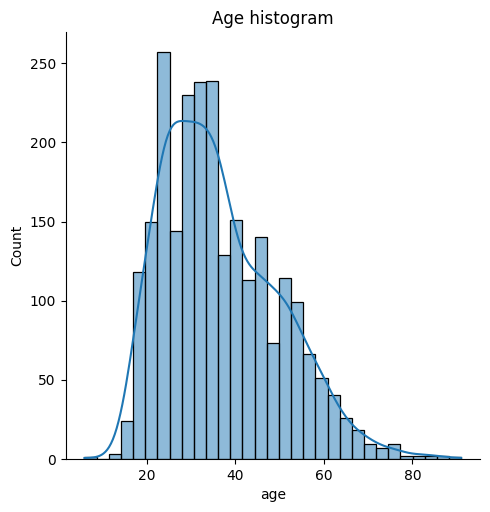

In [37]:
sns.displot(df_fatalities.age,
            kde=True)
plt.title("Age histogram")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

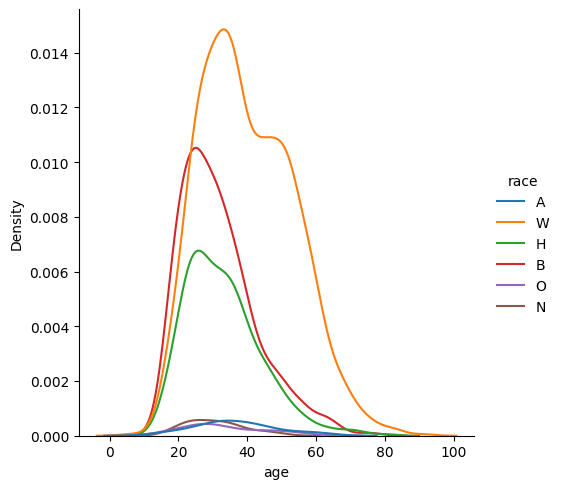

In [38]:
sns.displot(df_fatalities,
            x="age",
            hue="race",
            kind="kde")
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [39]:
fatal_race = df_fatalities.race.value_counts()

In [40]:
bar = px.bar(x=fatal_race.index,
             y=fatal_race.values,
             color=fatal_race.index)
bar.update_layout(title="Race of People Killed",
                  xaxis_title="Race",
                  yaxis_title="Count")
bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [41]:
fatal_mental = df_fatalities.signs_of_mental_illness.value_counts()

In [42]:
pie = px.pie(names=fatal_mental.index,
             values=fatal_mental.values,
             hole=0.5,
             title="Mental Illness and Police Killings")
pie.update_traces(textinfo="label+percent")
pie.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [43]:
top10_fatal_city = df_fatalities.groupby(["state", "city"], as_index=False).agg({"id": pd.Series.count}).sort_values("id", ascending=False)[:10]
top10_fatal_city["State_City"] = top10_fatal_city.state.astype(str) + ", "  +top10_fatal_city.city.astype(str)
top10_fatal_city.head()

,state,city,id,State_City
218,CA,Los Angeles,39,"CA, Los Angeles"
94,AZ,Phoenix,31,"AZ, Phoenix"
1314,TX,Houston,26,"TX, Houston"
561,IL,Chicago,25,"IL, Chicago"
990,NV,Las Vegas,21,"NV, Las Vegas"


In [44]:
bar = px.bar(top10_fatal_city,
             x="State_City",
             y="id",
             color="id",
             color_continuous_scale="Emrld")
bar.update_layout(title="Most Dangerous 10 City",
                  xaxis_title="City",
                  yaxis_title="Count")

bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [45]:
temp_share_race = df_share_race_city
temp_share_race.City = temp_share_race.City.str.replace(" CDP", "")
temp_share_race.City = temp_share_race.City.str.replace(" city", "")
temp_share_race["State_City"] = temp_share_race["Geographic area"] + ", " + temp_share_race.City

In [105]:
top10_race_rate = temp_share_race.loc[temp_share_race.State_City.isin(top10_fatal_city.State_City)][["State_City", "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]]
temp_total = top10_race_rate.loc[:, "share_white":].sum(axis=1)
for col in top10_race_rate.columns[1:]:
    top10_race_rate[col] = top10_race_rate[col] / temp_total * 100
top10_race_rate

,State_City,share_white,share_black,share_native_american,share_asian,share_hispanic
1201,"AZ, Phoenix",55.56,5.48,1.85,2.70,34.40
2714,"CA, Los Angeles",41.53,8.01,0.58,9.42,40.45
4633,"FL, Miami",44.51,11.77,0.18,0.61,42.92
6278,"IL, Chicago",39.89,29.17,0.44,4.88,25.62
14472,"MO, St. Louis",43.99,49.30,0.30,2.91,3.51
15666,"NV, Las Vegas",55.70,9.96,0.63,5.47,28.25
19379,"OH, Columbus",61.81,28.14,0.30,4.12,5.63
24543,"TX, Austin",57.54,6.82,0.76,5.31,29.57
25157,"TX, Houston",40.50,19.01,0.56,4.81,35.12
25872,"TX, San Antonio",49.73,4.73,0.62,1.64,43.29


In [47]:
temp_fatalities = df_fatalities
temp_fatalities["State_City"] = temp_fatalities.state + ", " + temp_fatalities.city

top10_city_race = temp_fatalities.loc[temp_fatalities.State_City.isin(top10_fatal_city.State_City)].groupby(["State_City", "race"], as_index=False).agg({"id": pd.Series.count})
top10_city_race.head()

,State_City,race,id
0,"AZ, Phoenix",B,2
1,"AZ, Phoenix",H,11
2,"AZ, Phoenix",N,3
3,"AZ, Phoenix",W,12
4,"CA, Los Angeles",A,1


In [78]:
top10_reshaped = top10_city_race.pivot(index="State_City", columns="race", values="id")
top10_reshaped.fillna(0, inplace=True)
top10_reshaped

race,A,B,H,N,O,W
State_City,,,,,,
"AZ, Phoenix",0.00,2.00,11.00,3.00,0.00,12.00
"CA, Los Angeles",1.00,10.00,19.00,0.00,0.00,6.00
"FL, Miami",0.00,8.00,6.00,0.00,0.00,2.00
"IL, Chicago",0.00,21.00,1.00,0.00,0.00,2.00
"MO, St. Louis",0.00,11.00,0.00,0.00,0.00,3.00
"NV, Las Vegas",0.00,3.00,5.00,0.00,0.00,9.00
"OH, Columbus",0.00,10.00,0.00,0.00,1.00,5.00
"TX, Austin",0.00,3.00,2.00,0.00,0.00,11.00
"TX, Houston",1.00,15.00,6.00,0.00,0.00,3.00


In [79]:
top10_reshaped["total"] = top10_reshaped.sum(axis=1)
for col in top10_reshaped.columns[:6]:
    top10_reshaped[col] = top10_reshaped[col] / top10_reshaped.total * 100

In [85]:
top10_reshaped.reset_index(inplace=True)

In [106]:
px.bar(top10_race_rate,
       x="State_City",
       y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"], 
       title="Actual Race Rate")

In [107]:
px.bar(top10_reshaped,
       x="State_City",
       y=["W", "B", "N", "A", "H", "O"],
       title="Killing Race Rate")

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [112]:
state_fatal = df_fatalities.groupby("state", as_index=False).agg({"id": pd.Series.count})

In [119]:
fig = px.choropleth(state_fatal,
                    locationmode="USA-states",
                    locations='state',
                    color='id',
                    color_continuous_scale="Blues",
                    scope="usa",
                    title="Police Killings by US State")
fig.show()

In [121]:
fig = px.choropleth(state_poverty,
                    locationmode="USA-states",
                    locations='Geographic Area',
                    color='poverty_rate',
                    color_continuous_scale="Blues",
                    scope="usa",
                    title="Poverty Rate by US State")
fig.show()

빈곤율이 높다고 해서 경찰에 의한 사망률이 높다고 하기 어렵다.

인구 수 등의 다른 요인이 있을 것이다.

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [150]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)

In [154]:
df_fatalities["year"] = df_fatalities.date.dt.year
df_fatalities["month"] = df_fatalities.date.dt.month

In [157]:
fatal_ym = df_fatalities.groupby(["year", "month"], as_index=False).agg({"id": pd.Series.count})
fatal_ym["y_m"] = fatal_ym.year.astype(str) + "-" + fatal_ym.month.astype(str)

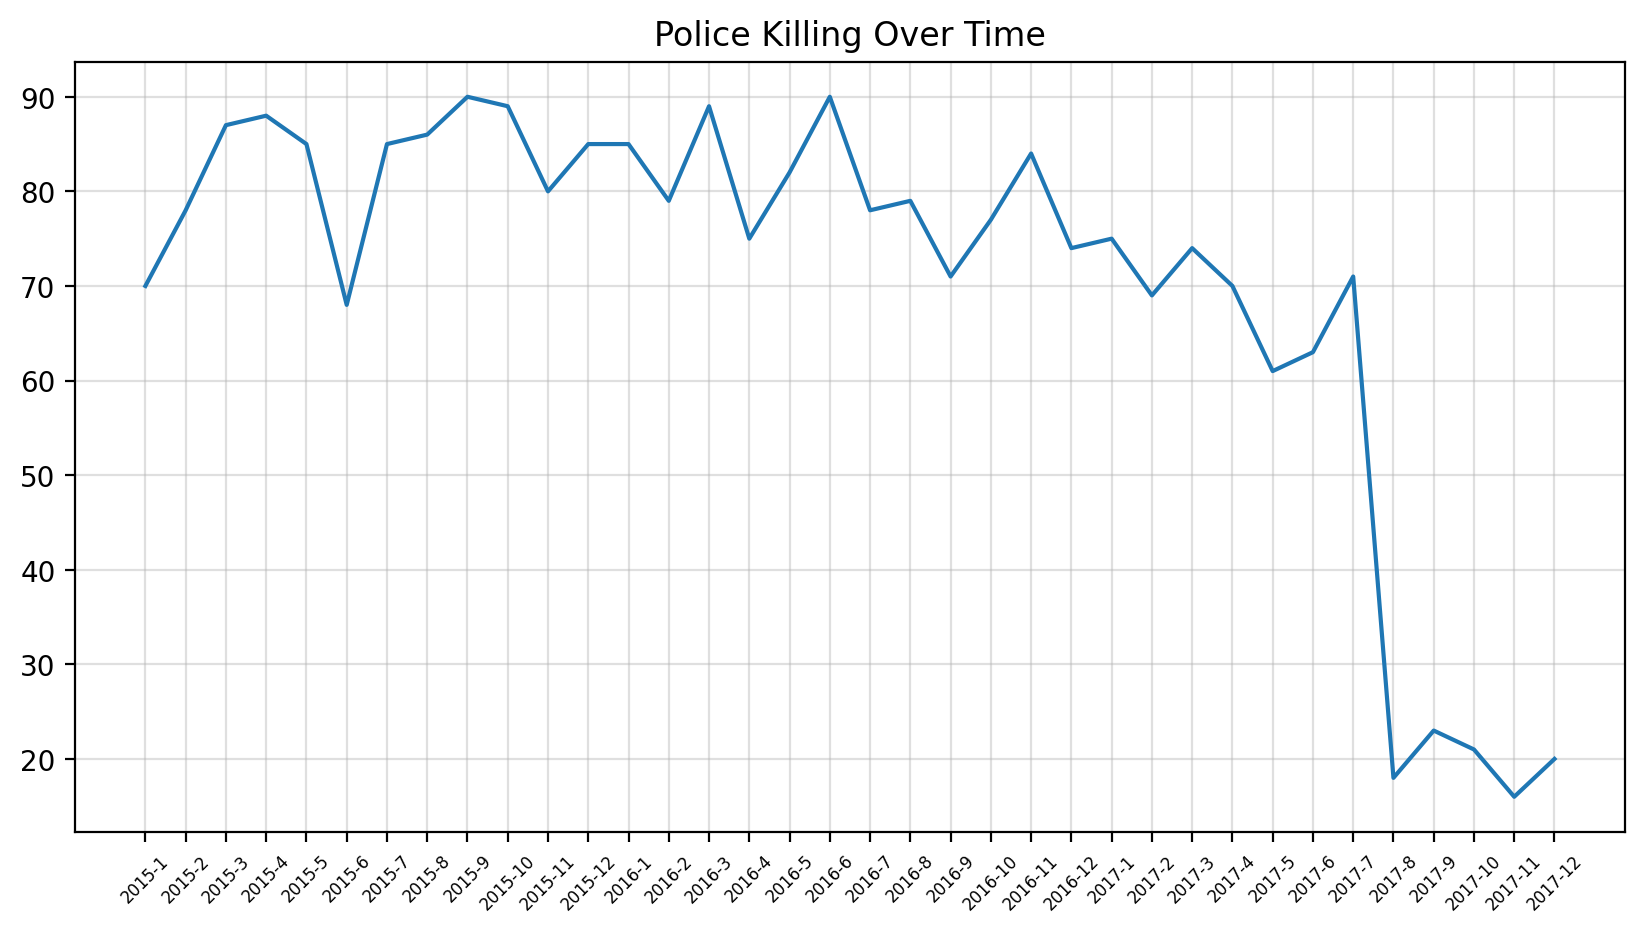

In [171]:
plt.figure(figsize=(10,5), dpi=200)
plt.title("Police Killing Over Time")
plt.xticks(fontsize=6, rotation=45)
plt.plot(fatal_ym.y_m,
         fatal_ym.id)
plt.grid("gray", alpha=0.4)
plt.show()

In [174]:
px.bar(df_fatalities.groupby("month", as_index=False).count(),
       x="month",
       y="id")

상반기가 하반기보다 사망 사건이 더 많음